In [25]:
# Colab environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Set some defaults
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

In [29]:
# 1. Load the data
# Note: update the path if you upload the file to Colab.
df = pd.read_csv('/content/kalimati_tarkari_dataset_merged_cleaned.csv')

In [30]:
df

,name_original,name,type,color,location,date,unit,maximum,minimum,average
0,tomato big nepali,tomato,big,NaN,nepali,2013-06-16,kg,40.0,35.0,37.5
1,tomato small local,tomato,small,NaN,local,2013-06-16,kg,32.0,26.0,29.0
2,potato red,potato,NaN,red,NaN,2013-06-16,kg,21.0,20.0,20.5
3,potato white,potato,NaN,white,NaN,2013-06-16,kg,16.0,15.0,15.5
4,onion dry indian,onion,dry,NaN,indian,2013-06-16,kg,30.0,28.0,29.0
...,...,...,...,...,...,...,...,...,...,...
356318,bottle_gourd,bottle_gourd,NaN,NaN,NaN,2025-06-29,kg,30.0,20.0,26.0
356319,bitter_gourd,bitter_gourd,NaN,NaN,NaN,2025-06-29,kg,40.0,30.0,36.0
356320,soyabean green,soyabean,NaN,green,NaN,2025-06-29,kg,120.0,100.0,113.0
356321,neuro,neuro,NaN,NaN,NaN,2025-06-29,kg,60.0,50.0,55.0


In [31]:
# 2. Inspect
print("First 5 rows:")
display(df.head())
print("\nInfo:")
print(df.info())
print("\nSummary statistics:")
display(df.describe(include='all'))

First 5 rows:


,name_original,name,type,color,location,date,unit,maximum,minimum,average
0,tomato big nepali,tomato,big,NaN,nepali,2013-06-16,kg,40.0,35.0,37.5
1,tomato small local,tomato,small,NaN,local,2013-06-16,kg,32.0,26.0,29.0
2,potato red,potato,NaN,red,NaN,2013-06-16,kg,21.0,20.0,20.5
3,potato white,potato,NaN,white,NaN,2013-06-16,kg,16.0,15.0,15.5
4,onion dry indian,onion,dry,NaN,indian,2013-06-16,kg,30.0,28.0,29.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356323 entries, 0 to 356322
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name_original  356323 non-null  object 
 1   name           356323 non-null  object 
 2   type           91904 non-null   object 
 3   color          60622 non-null   object 
 4   location       84529 non-null   object 
 5   date           356323 non-null  object 
 6   unit           356323 non-null  object 
 7   maximum        356323 non-null  float64
 8   minimum        356323 non-null  float64
 9   average        356323 non-null  float64
dtypes: float64(3), object(7)
memory usage: 27.2+ MB
None

Summary statistics:


,name_original,name,type,color,location,date,unit,maximum,minimum,average
count,356323,356323,91904,60622,84529,356323,356323,356323.000000,356323.000000,356323.000000
unique,138,90,25,4,7,4239,3,NaN,NaN,NaN
top,cauli local,chilli,dry,green,local,2021-03-16,kg,NaN,NaN,NaN
freq,4364,14613,20118,36765,37381,220,347005,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.195098,102.398826,108.949244
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.075944,103.602049,109.864798
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,40.000000,45.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,70.000000,75.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,120.000000,130.000000


In [32]:
# 3. Missing values – identify
print("\nMissing values count per column:")
print(df.isnull().sum())


Missing values count per column:
name_original         0
name                  0
type             264419
color            295701
location         271794
date                  0
unit                  0
maximum               0
minimum               0
average               0
dtype: int64


In [36]:
# 4. Handling missing values (not simply discarding)
# Let’s adopt an approach: for numeric columns we’ll fill missing by e.g. median or mode or interpolation,
# for categorical / object columns we might fill by mode or “Unknown”
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
object_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Object/categorical columns:", object_cols)

# Example strategy:
for col in object_cols:
    mode_val = df[col].mode().iloc[0]
    df[col] = df[col].fillna(mode_val)
    # choose median by default (you can also try other methods later)
    df[col] = df[col].fillna(median_val)

print("\nAfter filling missing values:")
print(df.isnull().sum())

Numeric columns: ['maximum', 'minimum', 'average']
Object/categorical columns: ['name_original', 'name', 'type', 'color', 'location', 'date', 'unit']

After filling missing values:
name_original    0
name             0
type             0
color            0
location         0
date             0
unit             0
maximum          0
minimum          0
average          0
dtype: int64


In [37]:
# 5. Central tendency – compute mean, median, mode and compare differences
for col in numeric_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_vals = df[col].mode().tolist()
    print(f"\nColumn: {col}")
    print(f"  Mean   : {mean_val}")
    print(f"  Median : {median_val}")
    print(f"  Mode   : {mode_vals}")


Column: maximum
  Mean   : 115.19509812726095
  Median : 80.0
  Mode   : [60.0]

Column: minimum
  Mean   : 102.3988262054372
  Median : 70.0
  Mode   : [50.0]

Column: average
  Mean   : 108.94924447762283
  Median : 75.0
  Mode   : [55.0]


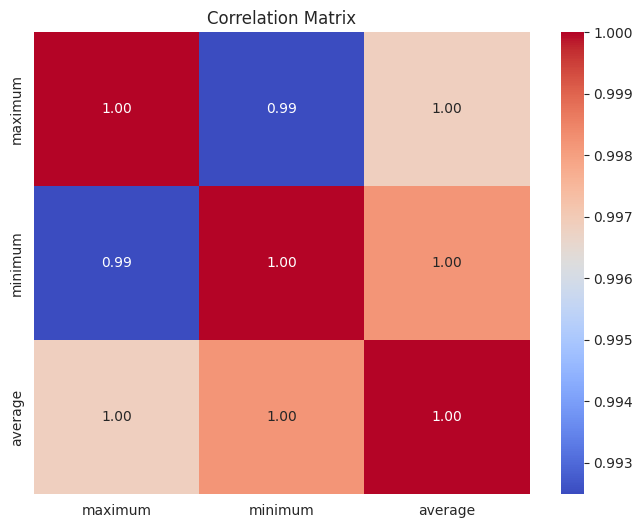

In [38]:
# 6. Visualizations / EDA
# Distribution of “Average” price (assuming column name 'Average')
if 'Average' in numeric_cols:
    plt.figure()
    sns.histplot(df['Average'], kde=True, color='blue')
    plt.title('Distribution of Average Price')
    plt.xlabel('Average Price')
    plt.ylabel('Frequency')
    plt.show()

# Boxplot for “Average” price by a categorical, e.g., Commodity (if exists)
if 'Commodity' in df.columns and 'Average' in df.columns:
    plt.figure(figsize=(12,6))
    # maybe show top few commodities to avoid huge clutter
    top_com = df['Commodity'].value_counts().nlargest(10).index
    sns.boxplot(data=df[df['Commodity'].isin(top_com)], x='Commodity', y='Average')
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Price Distribution by Commodity (top 10)')
    plt.show()

# Trend over time (e.g., for one commodity)
if 'Date' in df.columns and 'Commodity' in df.columns and 'Average' in df.columns:
    one_com = df[df['Commodity']==top_com[0]].sort_values('Date')
    plt.figure()
    plt.plot(one_com['Date'], one_com['Average'])
    plt.title(f"Average Price over Time for {top_com[0]}")
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.show()

# Correlation matrix for numeric features
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# 7. Interpretation & differences of mean/median/mode in missing‐value handling
# Print a small summary statement
print("""
Interpretation:
- The mean is sensitive to outliers; if prices have extreme values (e.g., a commodity spike) the mean will be pulled.
- The median is more robust to extreme values and gives the middle value, so if distribution is skewed, median may represent central tendency better.
- The mode gives the most frequently occurring value; for numeric data it may be less meaningful if many unique values, but for categorical data it's very useful.
By comparing mean, median, mode for each numeric column above, you can observe how different they are: e.g., if mean >> median, that suggests a right‐skewed distribution with high outliers.
When handling missing values:
- If you impute using mean, you are assuming symmetry and no extreme skew; may bias if skewed and outliers exist.
- If you impute using median, you’re more robust under skew and outliers.
- If you impute using mode (less common for numeric), you are forcing the most common value – good if many missing and a clear frequent value exists but could distort distribution.
""")


Interpretation:
- The mean is sensitive to outliers; if prices have extreme values (e.g., a commodity spike) the mean will be pulled.
- The median is more robust to extreme values and gives the middle value, so if distribution is skewed, median may represent central tendency better.
- The mode gives the most frequently occurring value; for numeric data it may be less meaningful if many unique values, but for categorical data it's very useful.
By comparing mean, median, mode for each numeric column above, you can observe how different they are: e.g., if mean >> median, that suggests a right‐skewed distribution with high outliers.
When handling missing values:
- If you impute using mean, you are assuming symmetry and no extreme skew; may bias if skewed and outliers exist.
- If you impute using median, you’re more robust under skew and outliers.
- If you impute using mode (less common for numeric), you are forcing the most common value – good if many missing and a clear frequent value ex

In [40]:
# 8. Save cleaned dataset (optional)
df.to_csv('/content/kalimati_tarkari_cleaned.csv', index=False)
print("Cleaned dataset saved.")

Cleaned dataset saved.
